# Get model checking results

In [43]:
include("../model_check.jl");

In [44]:
min_widths = [0.2 ,0.5]
lbs = [-11.0, -30.0]
ubs = [11.0, 30.0];

In [73]:
tree = create_tree(min_widths, lbs, ubs);

In [74]:
label_tree_observable!(tree);
#label_tree_failures!(tree);

In [75]:
model_check!(tree);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 0.0


# Plot them

In [6]:
include("viz_verification.jl")

get_filled_rectangle (generic function with 1 method)

In [7]:
include("support_code.jl");

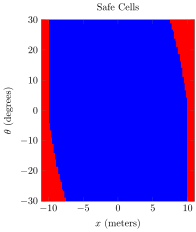

In [76]:
ax = plot_prob(tree)

In [8]:
#PGFPlots.save("fully_observable_reach.tex", ax, include_preamble = false);

In [11]:
#ax = plot_control_range(tree, nbin = 2000)

# Forward reachability results

In [77]:
num_steps = 50;

In [78]:
#trees = [create_tree(min_widths, lbs, ubs) for i = 1:num_steps+1];
init_tree = copy(tree)
one_out!(init_tree);

In [49]:
# label_tree_with_prob!(trees[1], 1.0)
# for i = 1:num_steps
#     label_tree_with_prob!(trees[i+1], 0.0)
# end

In [51]:
include("../model_check.jl");

In [79]:
trees = forward_reach(init_tree, verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: false
[Iteration 18] converged: false
[Iteration 19] converged: false
[Iteration 20] converged: false
[Iteration 21] converged: false
[Iteration 22] converged: false
[Iteration 23] converged: false
[Iteration 24] converged: true


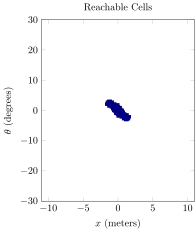

In [80]:
ax = plot_reachable(trees[end])

# Reachability GIF

In [21]:
using Reel
Reel.extension(m::MIME"image/svg+xml") = "svg"
Reel.set_output_type("gif"); # may be necessary for use in IJulia

In [81]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 1:length(trees)
    ax = plot_reachable(trees[i])
    ax.title = i < length(trees) ? L"$t$ = %$(i-1)" : "Converged"
    push!(frames, ax)
end
for i = 1:7
    ax = plot_reachable(trees[end])
    ax.title = "Converged"
    push!(frames, ax)
end
frames

Frames{MIME{Symbol("image/svg+xml")}}("/tmp/jl_WSxiBy", 0x0000000000000020, 3.0, nothing)

# Neural Network Analysis

In [14]:
using BSON

In [55]:
include("../model_check.jl");

In [142]:
nn_tree = BSON.load("../verified_trees/msle256x4_tree.bson")[:tree];

In [143]:
label_tree_failures!(nn_tree);

In [144]:
model_check!(nn_tree);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 1.0
[Iteration 4] residual: 1.0
[Iteration 5] residual: 0.0


In [145]:
ax = plot_prob(nn_tree);

In [38]:
#PGFPlots.save("big_uniform_safe_cells.tex", ax, include_preamble = false)

In [146]:
init_tree = copy(nn_tree)
#one_out!(init_tree);
label_start_states!(init_tree, [-10.0, -10.0], [10.0, 10.0]);

In [147]:
nn_trees = forward_reach(init_tree, verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: false
[Iteration 18] converged: false
[Iteration 19] converged: false
[Iteration 20] converged: false
[Iteration 21] converged: false
[Iteration 22] converged: false
[Iteration 23] converged: true


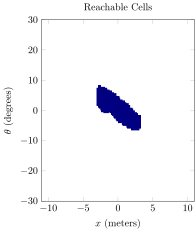

In [148]:
ax = plot_reachable(nn_trees[end])
# ax.xmin = -5.0
# ax.xmax = 5.0
# ax.ymin = -8.0
# ax.ymax = 5.0
ax

In [149]:
get_leaf(nn_trees[end].root_node, [0.0, 0.0])

LEAFNODE(-1.2818381014026023, 0.6665030820292157, 1.0)

In [150]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 1:length(nn_trees)
    ax = plot_reachable(nn_trees[i])
    ax.title = i < length(nn_trees) ? L"$t$ = %$(i-1)" : "Converged"
    push!(frames, ax)
end
for i = 1:7
    ax = plot_reachable(nn_trees[end])
    ax.title = "Converged"
    push!(frames, ax)
end
frames

Frames{MIME{Symbol("image/svg+xml")}}("/tmp/jl_8N5VO5", 0x000000000000001f, 3.0, nothing)

In [102]:
nn_tree_big = BSON.load("../verified_trees/big_normal_tree.bson")[:tree];

In [103]:
init_tree = copy(nn_tree_big)
one_out!(init_tree);

In [104]:
label_tree_failures!(nn_tree_big);

In [105]:
model_check!(nn_tree_big);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 1.0
[Iteration 4] residual: 1.0
[Iteration 5] residual: 0.0


In [106]:
ax = plot_prob(nn_tree_big);

In [107]:
PGFPlots.save("big_MLP_reach.tex", ax, include_preamble = false);

In [81]:
nn_trees_big = forward_reach(init_tree, verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: true


In [151]:
g = GroupPlot(5, 1, groupStyle = "horizontal sep = 1cm, vertical sep = 1.5cm")
for i = [1, 5, 10, 15, 24]
    ax = plot_reachable(nn_trees[i])
    ax.title = i == 17 ? "Converged" : L"$t$ = %$(i)"
    if i != 1
        ax.ylabel = ""
    end
    ax.height = "4cm"
    ax.width = "4cm"
    push!(g, ax)
end
#g

In [113]:
PGFPlots.save("big_mlp_forward_reach.tex", g, include_preamble = false);

In [83]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 1:length(nn_trees_big)
    ax = plot_reachable(nn_trees_big[i])
    ax.title = i < length(nn_trees_big) ? L"$t$ = %$(i-1)" : "Converged"
    push!(frames, ax)
end
for i = 1:7
    ax = plot_reachable(nn_trees_big[end])
    ax.title = "Converged"
    push!(frames, ax)
end
frames

Frames{MIME{Symbol("image/svg+xml")}}("/tmp/jl_Ildn3M", 0x0000000000000019, 3.0, nothing)

In [20]:
res = BSON.load("/home/smkatz/Downloads/dcgan_losses.bson")

Dict{Symbol,Any} with 2 entries:
  :disc_losses => Any[1.38614, 0.198976, 0.339361, 0.336866, 0.223263, 0.062824…
  :gen_losses  => Any[0.696409, 4.38602, 2.40021, 2.08908, 3.01897, 3.7724, 5.3…

In [29]:
dl = Float64.(res[:disc_losses])
gl = Float64.(res[:gen_losses]);

In [24]:
xs = collect(range(0, length = length(dl), step = 50));

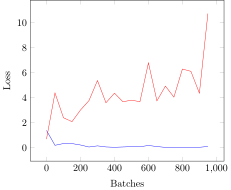

In [32]:
ax = Axis(Plots.Linear(xs[1:20], dl[1:20], mark = "none"))
push!(ax, Plots.Linear(xs[1:20], gl[1:20], mark = "none"))
ax.xlabel = "Batches"
ax.ylabel = "Loss"
ax

# Runway results

In [26]:
include("../model_check.jl");

In [29]:
include("viz_verification.jl");

In [129]:
resetPGFPlotsPreamble()
pushPGFPlotsPreamble("\\usetikzlibrary{intersections}");

In [130]:
include("support_code.jl");

In [6]:
using BSON

In [152]:
nn_tree_big = BSON.load("../verified_trees/msle256x4_tree.bson")[:tree];

In [153]:
min_widths = [0.2, 0.5, 3.0]
lbs = [-11.0, -30.0, 0.0]
ubs = [11.0, 30.0, 150.0];

In [154]:
# Create tree with x, y, and θ
total_tree = create_tree(min_widths, lbs, ubs);

In [155]:
# Create tree with just x and y
xy_tree = create_tree(min_widths[[1, 3]], lbs[[1, 3]], ubs[[1, 3]]);

In [156]:
# Get the proper control outputs onto the larger tree
label_xyθ!(total_tree, nn_tree_big);

In [157]:
# Label the starting states with probability 1
label_start_states!(total_tree, [-8.0, -2.0, 0.0], [8.0, 2.0, 3.0]);
#label_start_states!(total_tree, [-10.0, -30.0, 0.0], [10.0, 30.0, 3.0]);

In [158]:
trees = forward_reach(total_tree, xy_tree; max_iter = 20, verbose = true);

[Iteration:] 1
[Iteration:] 2
[Iteration:] 3
[Iteration:] 4
[Iteration:] 5
[Iteration:] 6
[Iteration:] 7
[Iteration:] 8
[Iteration:] 9
[Iteration:] 10
[Iteration:] 11
[Iteration:] 12
[Iteration:] 13
[Iteration:] 14
[Iteration:] 15
[Iteration:] 16
[Iteration:] 17
[Iteration:] 18
[Iteration:] 19
[Iteration:] 20


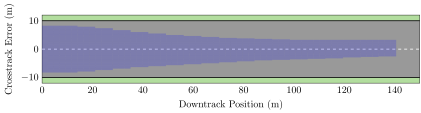

In [127]:
ax = plot_reachable_cells_on_road(trees[20], opacity = 0.2)

In [82]:
frames = Frames(MIME("image/svg+xml"), fps=5);
for i = 0:length(trees) - 1
    ax = plot_reachable_cells_on_road(trees[i+1])
    ax.title = i < 17 ? L"$t = %$(i)$" : "Converged"
    push!(frames, ax)
end
frames

LoadError: StackOverflowError:

# Plot with sample trajectories

In [129]:
using Flux

┌ Warning: This version of CUDA.jl only supports NVIDIA drivers for CUDA 10.1 or higher (yours is for CUDA 9.1.0)
└ @ CUDA /home/smkatz/.julia/packages/CUDA/wTQsK/src/initialization.jl:100
┌ Warning: This version of CUDA.jl only supports CUDA 10.1 or higher (your toolkit provides CUDA 9.1.0)
└ @ CUDA /home/smkatz/.julia/packages/CUDA/wTQsK/src/initialization.jl:106
┌ Warning: CUDA.jl found cuda, but did not find libcudnn. Some functionality will not be available.
└ @ Flux /home/smkatz/.julia/packages/Flux/YO4zY/src/Flux.jl:57


In [130]:
using Distributions

In [131]:
model = BSON.load("../../../models/full_msle_uniform.bson")[:model];

In [132]:
function sim_dubins(x₀, θ₀, y₀, get_steering; num_steps = 500, dt = 0.05, ctrl_every = 20)
	xs = zeros(num_steps + 1)
	θs = zeros(num_steps + 1)
	ys = zeros(num_steps + 1)
	
	xs[1] = x₀
	θs[1] = θ₀
	ys[1] = y₀
	
	ϕ = clamp(get_steering([x₀, θ₀]), -60, 60)
	
	for i = 2:num_steps + 1
		s = [xs[i - 1], θs[i - 1]]
		if mod(i - 1, ctrl_every) == 0
			ϕ = clamp(get_steering(s), -60, 60)
		end
		x′, θ′, y′ = next_state(xs[i - 1], θs[i - 1], ys[i - 1], ϕ, dt = dt)
		xs[i] = x′
		θs[i] = θ′
		ys[i] = y′
	end
	
	return xs, θs, ys
end	

sim_dubins (generic function with 1 method)

In [133]:
k1 = -0.74
k2 = -0.44;

In [134]:
function get_control_generator(s)
	l = rand(truncated(Normal(0, 1), -1, 1), 2)
	snorm = s ./ [6.366468343804353, 17.248858791583547]
	input = [l; snorm]
	pred = model(input)
	return k1 * pred[1] + k2 * pred[2]
end

get_control_generator (generic function with 1 method)

In [135]:
start_ctes = [8.0, 6.0, 4.0, 2.0, 0.0, -2.0, -4.0, -6.0, -8.0];

In [136]:
xres = []
yres = [];

In [137]:
for start_cte in start_ctes
    xs, _, ys = sim_dubins(start_cte, 0.0, 0.0, get_control_generator, 
			ctrl_every = 20, num_steps = 550)
    push!(xres, xs)
    push!(yres, ys)
end

In [159]:
ax = plot_reachable_cells_and_trajs_on_road(trees[20], xres, yres, opacity = 0.3, xmax = 130.0);

In [160]:
PGFPlots.save("runway_reach.tex", ax, include_preamble = false);

In [139]:
function get_reach_traj_snapshot(time_step)
    xres_step = [xres[i][1:5:end] for i = 1:length(xres)]
    yres_step = [yres[i][1:5:end] for i = 1:length(xres)]
    ax = plot_reachable_cells_and_trajs_on_road(trees[time_step + 1],
                                                    xres_step, yres_step, xmax = 145.0, 
                                                    opacity = 0.3)
    ax.title = time_step < 17 ? L"$t = %$(time_step)$" : "Converged"
    return ax
    
end

get_reach_traj_snapshot (generic function with 1 method)

In [127]:
ax = get_reach_traj_snapshot(20)

LoadError: BoundsError: attempt to access 18-element Array{KDTREE,1} at index [21]

In [55]:
using Reel
Reel.extension(m::MIME"image/svg+xml") = "svg"
Reel.set_output_type("gif"); # may be necessary for use in IJulia

In [72]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 0:length(trees) - 1
    ax = get_reach_traj_snapshot(i)
    push!(frames, ax)
end
frames

Frames{MIME{Symbol("image/svg+xml")}}("/tmp/jl_KIzaVD", 0x0000000000000015, 3.0, nothing)

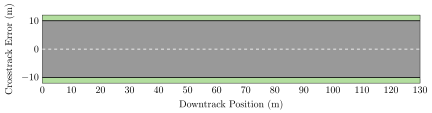

In [93]:
ax = get_road(xmax = 130)

In [94]:
PGFPlots.save("blank_runway.pdf", ax);

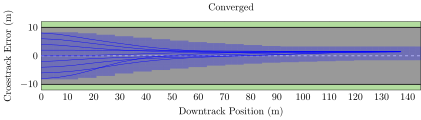

In [140]:
ax = get_reach_traj_snapshot(20)

In [141]:
PGFPlots.save("forward_reach_runway.tex", ax, include_preamble = false);

In [142]:
res = BSON.load("/home/smkatz/Downloads/dcgan_losses.bson")

Dict{Symbol,Any} with 2 entries:
  :disc_losses => Any[1.38614, 0.198976, 0.339361, 0.336866, 0.223263, 0.062824…
  :gen_losses  => Any[0.696409, 4.38602, 2.40021, 2.08908, 3.01897, 3.7724, 5.3…

In [143]:
dl = Float64.(res[:disc_losses])
gl = Float64.(res[:gen_losses]);

In [144]:
xvals = collect(range(1, length = length(dl), step = 50));

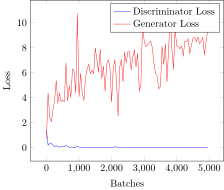

In [153]:
ax = Axis(Plots.Linear(xvals[1:100], dl[1:100], mark = "none", legendentry = "Discriminator Loss"))
push!(ax, Plots.Linear(xvals[1:100], gl[1:100], mark = "none", legendentry = "Generator Loss"))
ax.xlabel = "Batches"
ax.ylabel = "Loss"
ax

In [154]:
PGFPlots.save("loss_curves.tex", ax, include_preamble = false);